<h1> DSCI 100; Final Project Report </h1>

### ***Group Members (Group 31):*** Ivan Liu (28950673), Isabella Huang (53142667), Parleen Uppal (70438452), and Arman Behzadnia (89834832)

Github Repository Link: https://github.com/Arzmxn/dsci-100-2025W-009-31

<h2> Introduction & Description</h2>	


**Background Information**

Game-related newsletters are used by developers and publishers to keep players informed about events and updates and increase player engagement. The UBC Computer Science research group is conducting a study on player behaviour in video games using a Minecraft research server. The team must target recruitment efforts, so understanding what factors may influence a player to subscribe can help them effectively recruit. 

We are given two datasets, but we will only be using the `players.csv` dataset. Players differ in their demographics, such as experience, age, and gender, gaming experience, and engagement levels. These differences can influence their preferences for receiving newsletters. In this project, we will answer the broad question below, and specifically try to predict subscription status. 

**Broad Question**

What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types? 

**Specific Question** 

Can played hours and age predict subscription status in `players.csv`? 

**Expected Findings**

We expect to find that played hours and age will be able to predict the subscription status. We hypothesize that played hours will be a stronger predictor of newsletter subscription status, while age will have a weaker effect. Players who spend more time playing Minecraft are more likely to be more engaged and invested, and this higher engagement could influence their decision to subscribe to a newsletter. In contrast, age may influence the communication preferences slightly, but we do not expect that it will strongly determine subscription behaviour. We expect to see higher played hours correlate positively with subscription status. Overall, both variables will have an effect on the status, with played hours being a more significant predictor.

<h2> Data Summary Description</h2>	

To answer the specific question, we will be using the players.csv dataset. The file "players.csv" contains demographic and behavioural information; there are seven variables that are `experience`, `subscribe`, `hashedEmail`, `played_hours`, `name`, `gender`, and `Age`. Within this file, there are 196 observations and only the `Age` variable is missing two values. The key indentifier of each player is the "hashedEmail" variable, which is unique to each player. 



| Variable | Type | Missing Values | Unique Values | Description / Notes |
|-----------|------|----------------|----------------|----------------------|
| `experience` | chr | 0 | 5 | Describes the gaming experience of each player. Categories/limited number of values for data include Veteran, Pro, Regular, Amateur and Beginner in order of experience. |
| `subscribe` | lgl | 0 | 2 | Logical data type that indicates whether the player subscribed to the game-related newsletter. |
| `hashedEmail` | chr | 0 | 196 | Unique anonymized player ID (key for joining with `sessions.csv`). This identifies the players and is a string of lowercase letters and numbers. |
| `played_hours` | int | 0 | 43 | Total number of hours played of each player. |
| `name` | chr | 0 | 196 | Player alias or name (not used as an analytical variable). |
| `gender` | chr | 0 | 7 | Player-reported gender (categorical). Categories of gender include: Male, Female, Agender, Non-binary, and some individuals indicated "prefer not to say". |
| `Age` | int | 2 | 32 | Player’s age  |

<h2> Methods and Results </h2>

**Loading the Packages**

The first step was to load all necessary libraries for data manipulation, visualization, and modelling. These packages provide the tools needed for reading data, wrangling variables, creating graphics, and performing KNN classification.

In [1]:
library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 10) 

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

**Reading the Dataset**

We can import the `players.csv` file, which contains player demographics and behaviour measures. This dataset will be used to investigate whether played hours and age predict newsletter subscription status (as mentioned in the Introduction). 

In [3]:
player_data=read_csv("https://raw.githubusercontent.com/Arzmxn/dsci-100-2025W-009-31/refs/heads/main/players.csv")
player_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,TRUE,b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,0.0,Bailey,Female,17
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57


**Wrangling and Cleaning the Data**

We prepared the dataset by:
- Converting **subscription status** into a factor variable
- Selecting only the variables relevant to our question:  
  **subscribe, played_hours, Age**
- Filtering out invalid or missing age values

This creates a clean dataset for analysis and visualization.

In [5]:
wrangled_player=player_data|>
    mutate(subscribe=as_factor(subscribe))|>
    select(subscribe,played_hours,Age)|>
    filter(Age>=0)
wrangled_player

subscribe,played_hours,Age
<fct>,<dbl>,<dbl>
TRUE,30.3,9
TRUE,3.8,17
FALSE,0.0,17
TRUE,0.7,21
TRUE,0.1,21
⋮,⋮,⋮
TRUE,0.0,20
TRUE,0.0,17
FALSE,0.3,22


**Summary Statistics for Key Variables**

We calculated the mean values of **played hours** and **age**. This provides a simple numerical overview of the dataset before visualization and modelling.

In [6]:
summary_data=player_data|>  
    select(played_hours,Age)|>
    summarize(across(played_hours:Age, ~ mean(.x, na.rm = TRUE)))
summary_data

played_hours,Age
<dbl>,<dbl>
5.845918,21.13918


**Scatterplot of Age vs Played Hours**

This scatterplot shows the relationship between **age** and **total played hours**, with points colored by **subscription status**.  
It allows us to visually check for potential patterns related to the prediction task.

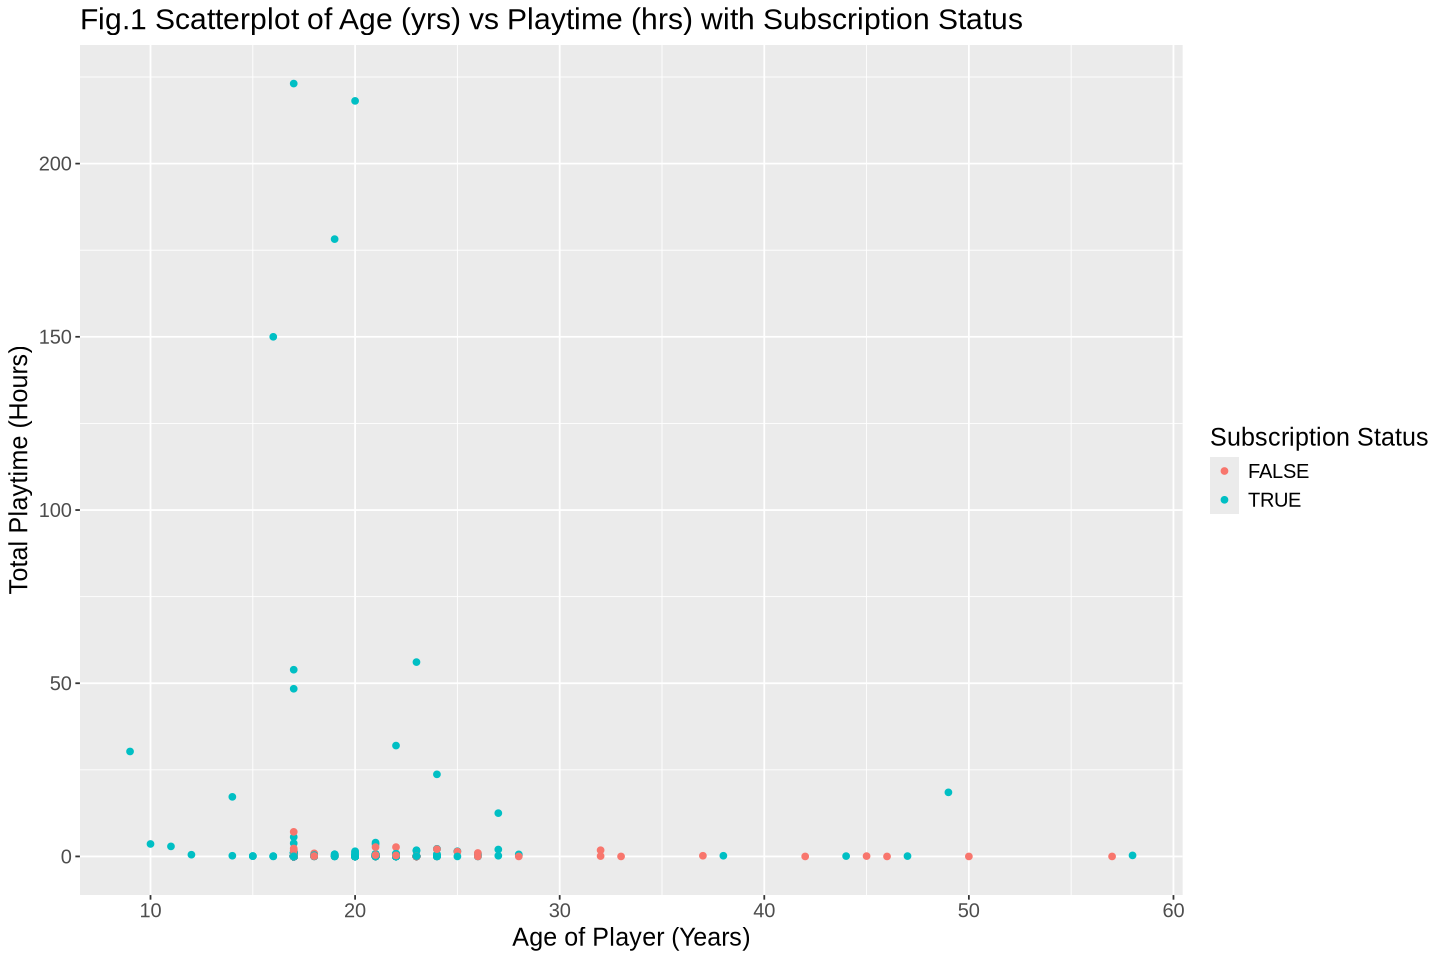

In [7]:
options(repr.plot.width = 12, repr.plot.height = 8)
scatter_viz=wrangled_player|>
    ggplot(aes(x=Age,y=played_hours,color=subscribe))+
    geom_point()+
    labs(x="Age of Player (Years)",y="Total Playtime (Hours)",
         color="Subscription Status",
         title = "Fig.1 Scatterplot of Age (yrs) vs Playtime (hrs) with Subscription Status")+
    theme(text = element_text(size = 15))

scatter_viz

**Histogram of Age**

This histogram displays the distribution of player ages and how the count of players in each age group differs by **subscription status**.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


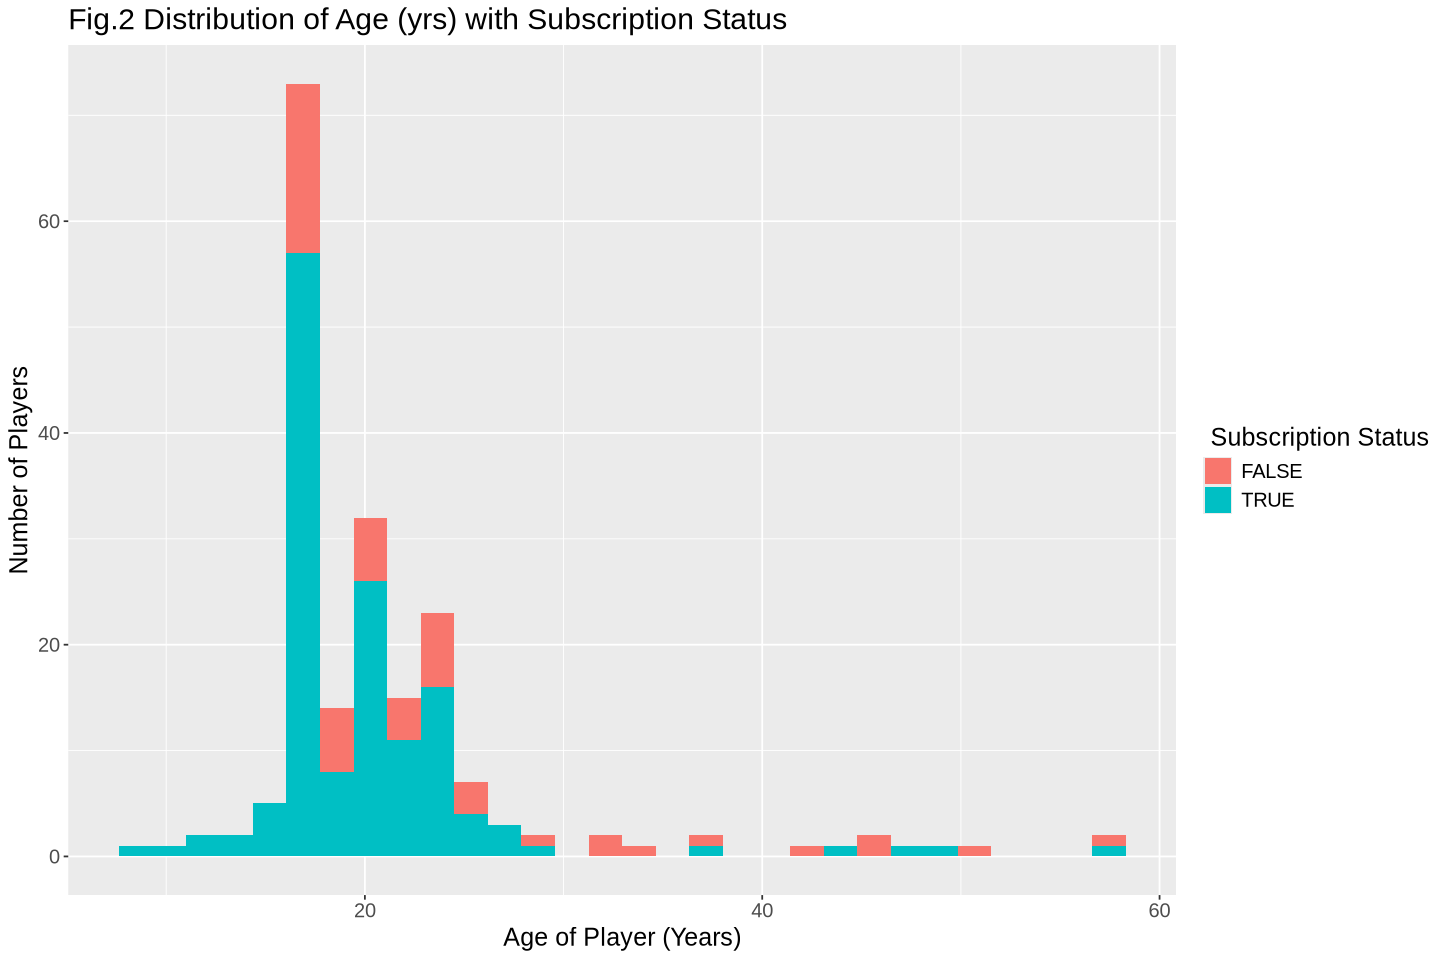

In [20]:
histogram_viz_1=wrangled_player|>
    ggplot(aes(x=Age,fill=subscribe))+
    geom_histogram()+
    labs(x="Age of Player (Years)",y="Number of Players",
         fill=" Subscription Status",
         title = "Fig.2 Distribution of Age (yrs) with Subscription Status")+
    theme(text = element_text(size = 15))

histogram_viz_1

**Histogram of Played Hours**

This histogram shows how total playtime is distributed among players, with colours indicating whether the player subscribed to the newsletter.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


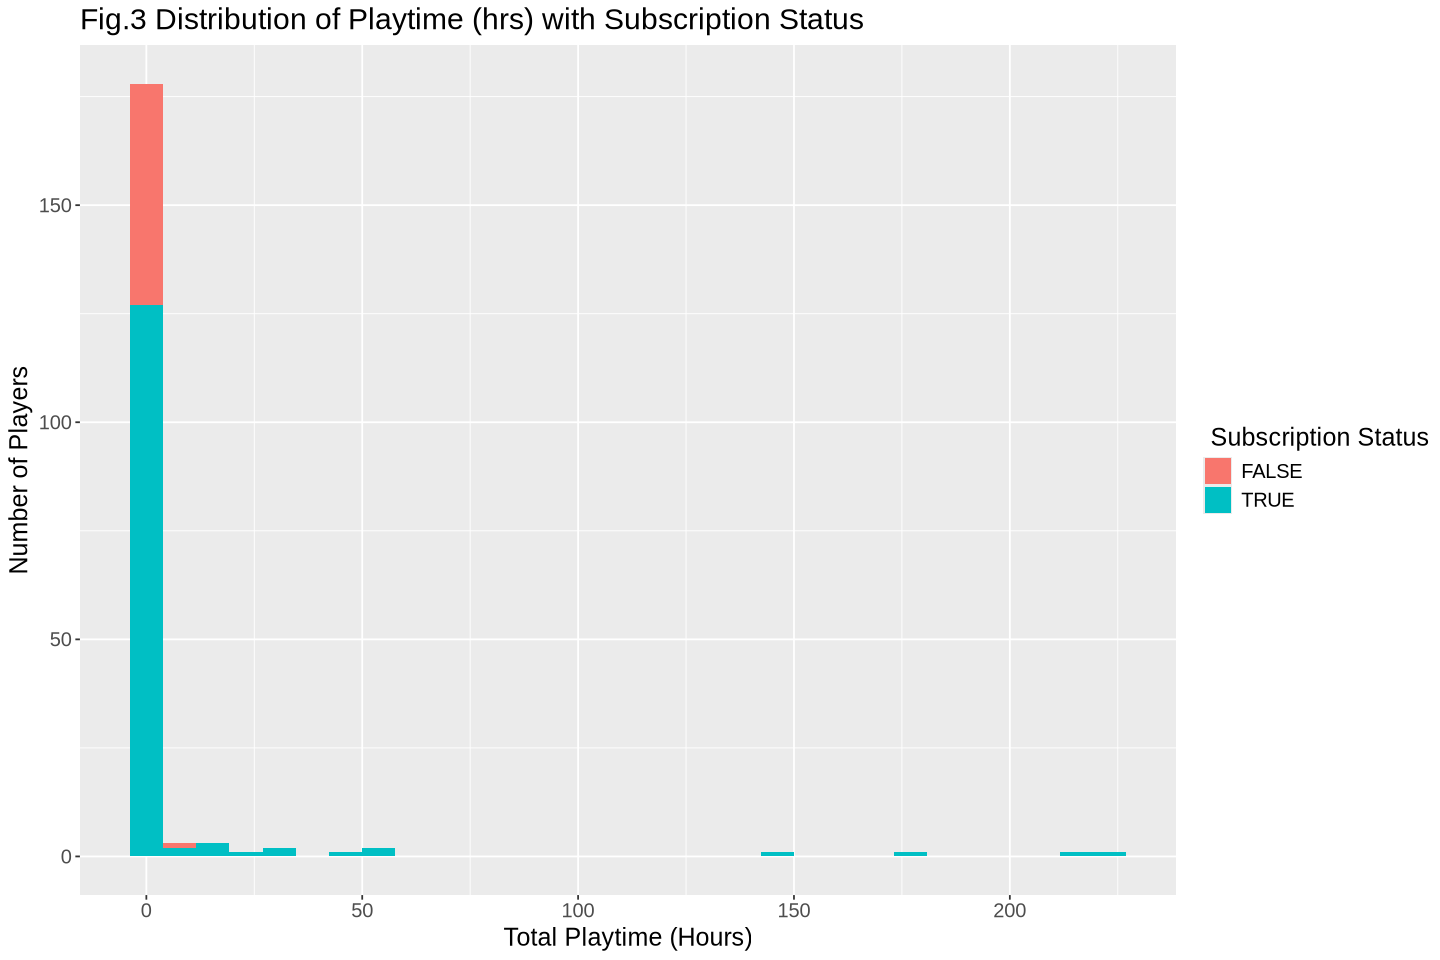

In [21]:
histogram_viz_2=wrangled_player|>
    ggplot(aes(x=played_hours,fill=subscribe))+
    geom_histogram()+
    labs(x="Total Playtime (Hours)",y="Number of Players",
         fill=" Subscription Status",
         title = "Fig.3 Distribution of Playtime (hrs) with Subscription Status")+
    theme(text = element_text(size = 15))

histogram_viz_2

**Splitting the Data**

We split the data into **training (75%)** and **testing (25%)** sets, stratifying by subscription status to keep class proportions balanced.

In [22]:
set.seed(123123123)

player_split <- initial_split(wrangled_player, prop = 0.75, strata = subscribe)
player_train <- training(player_split)
player_test <- testing(player_split)

**Preprocessing (Recipe)**

We created a recipe that:
- Uses **played_hours** and **age** to predict **subscription**
- **Scales and centers** the predictor variables

Scaling is required for distance-based models like KNN.

In [23]:
player_recipe <- recipe(subscribe ~ played_hours + Age , data = player_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

**Cross-Validation**

We used **5-fold cross-validation** to tune and evaluate the KNN model while maintaining balanced class distributions.

In [24]:
player_vfold <- vfold_cv(player_train, v = 5, strata = subscribe)

**KNN Tuning Setup**

We then defined a KNN model where the number of neighbours (**K**) will be tuned. A grid of K values from 1 to 20 is created for evaluation.

In [25]:
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
       set_engine("kknn") |>
       set_mode("classification")

k_vals <- tibble(neighbors = seq(from = 1, to = 20, by = 1))

**Evaluating K Values and Selecting an Optimal K Value**

Next, we performed a grid search using the cross-validation folds and collected accuracy metrics for each value of K. We also extracted the K value that produced the highest classification accuracy.

In [26]:
knn_player_results <- workflow() |>
       add_recipe(player_recipe) |>
       add_model(knn_tune) |>
       tune_grid(resamples = player_vfold, grid = k_vals) |>
       collect_metrics()

best_k_value=knn_player_results|>
    filter(.metric=="accuracy")|>
    select(neighbors,mean)

**Training the Final KNN Model**

Using the best-performing K value from tuning (see Fig. 4), we fit the final model to the training data.

In [28]:
knn_best <- nearest_neighbor(weight_func = "rectangular", neighbors = 16) |>
       set_engine("kknn") |>
       set_mode("classification")

player_best_fit <- workflow() |>
       add_recipe(player_recipe) |>
       add_model(knn_best) |>
       fit(player_train)

**Generating Predictions**

We can apply the final model to the testing set and bind predictions to the original test data.

In [29]:
player_predictions <- predict(player_best_fit, player_test) |>
                        bind_cols(player_test)

**Model Performance Evaluation**

We computed classification metrics on the testing set, including accuracy and other standard performance measures, using the code below. 

In [30]:
player_metrics <- player_predictions |> 
    metrics(truth = subscribe, estimate = .pred_class)

player_metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.73469388
kap,binary,0.06734993


**Visualization of Accuracy Across K Values**

This line plot shows the **accuracy estimate** for each tested K value. It illustrates how the best K was selected during tuning.

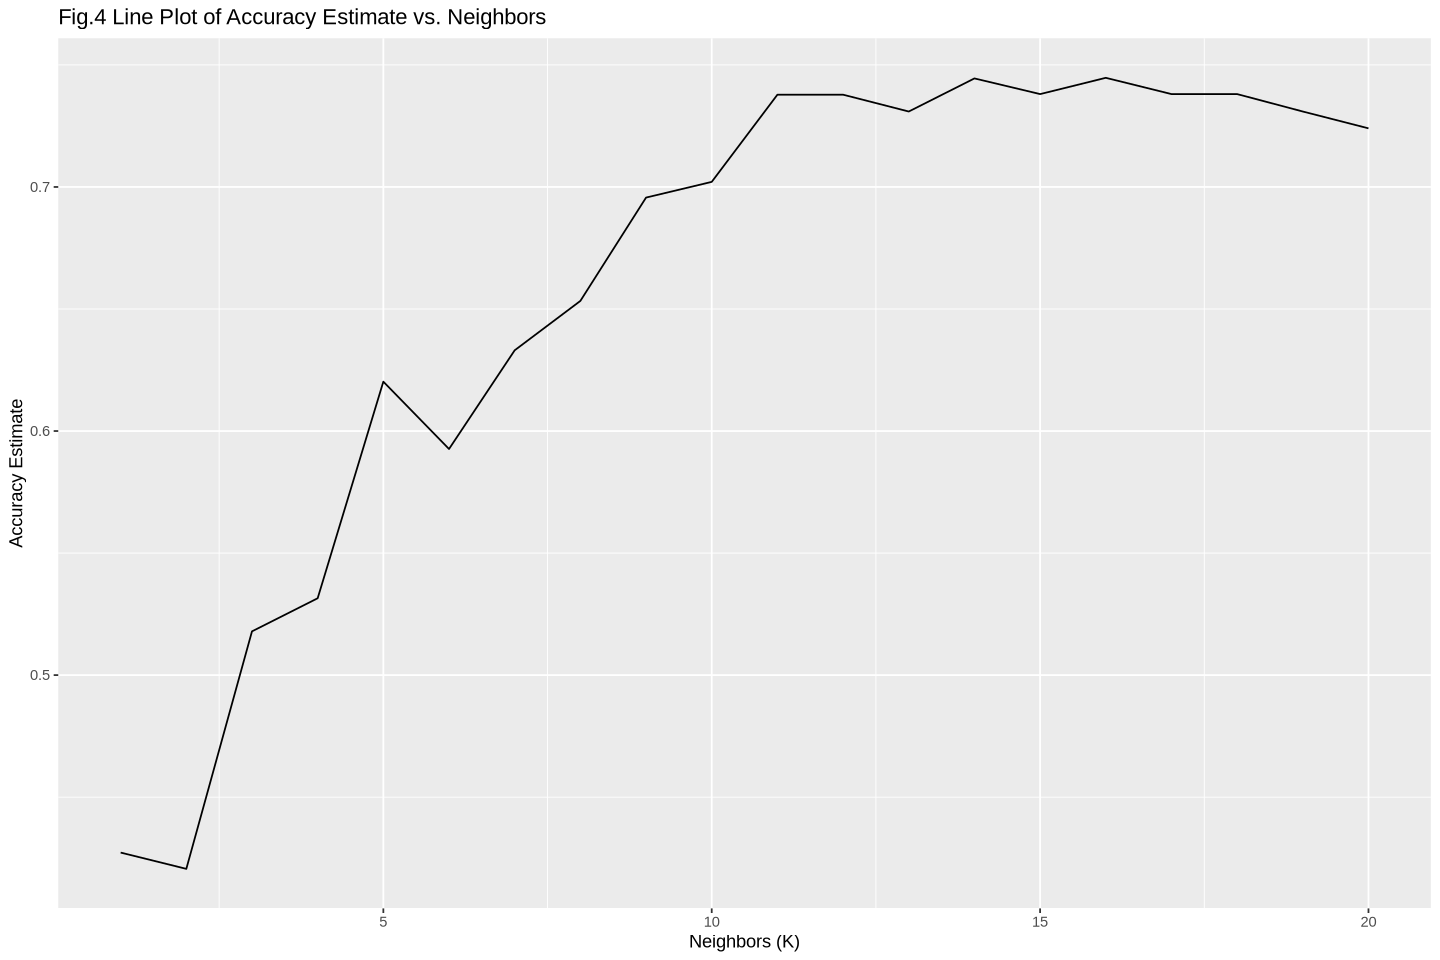

In [31]:
vis_of_best_k=best_k_value|>
    ggplot(aes(x=neighbors,y=mean))+
    geom_line()+
    labs(x="Neighbors (K)", y="Accuracy Estimate")+
    ggtitle("Fig.4 Line Plot of Accuracy Estimate vs. Neighbors")

vis_of_best_k

<h2> Discussion </h2>


**Fig. 1: Scatterplot of Age (yrs) vs. Playtime (hrs) with Subscription Status**

Figure 1's scatterplot visualizes the relationship between two numerical variables, the age of the player and the player's total playtime. Most data points cluster near the bottom of the plot, which shows that most of the players have relatively lower playtime (under 50 hours) regardless of their age. However, there are a few outliers in the plot, with some players with over 500 hours, all of whom are in the subscribed category. The age of the players ranges from early teens to mid-40s, but the subscription status does not show a clear trend across these ages and is distributed across all ages. One pattern that should be noted is that players with greater played hours are more likely to subscribe, as seen in the outliers of 50+ hours, while age seems to have a lower influence and is not a strong predictor of newsletter subscription.  This supports our hypothesis that engagement is a stronger predictor of newsletter subscription than age. 

**Fig. 2: Histogram of Age (yrs) with Subscription Status**

Figure 2's histogram represents how the ages of players are distributed across subscribed and non-subscribed players. One finding from the plot reveals that the majority of players fall between the ages of 15 and 30, with a peak around age 20. Both subscribed and non-subscribed players are concentrated in this range, with the proportions of both statuses appearing similar. Very few players are younger than 15 or older than 35, and we found that while players above 30 may seem less likely to subscribe, this observation is limited by the small number of players in that age group. When taking all of these interpretations together, this histogram leads us to understand that while most players are younger adults, the likelihood of subscribing to the newsletter is fairly evenly distributed  across the age range. This suggests that age cannot be used as a strong predictor for subscription status and aligns with our hypothesis that engagement will be a stronger predictor. 

**Fig. 3: Distribution of Playtime (hrs) with Subscription Status**

Figure 3 shows the distribution of play time in hours with the two subscription statuses. This histogram reveals that the majority of the players have playtimes of under 50, where both subscribed and non-subscribed players are present in significant numbers, making it difficult to determine a clear pattern of dominance. Although we can see that there are slightly more subscribed players in this lower playtime range, the overlap that exists between the two groups suggests that we should not use playtime alone to separate subscription status in this range.

As playtime increases beyond 50 hours, the number of players drops sharply, but the few players who remain are subscribed. We can conclude that extremely high engagement correlates strongly with subscription, but for the majority of players with low playtime, the relationship is less clear, as the visualization does not clearly display different hour ranges. 

**Fig. 4: Line Plot of Accuracy Estimates vs. Neighbours**

This visualization is a line plot that shows how the accuracy of a KNN classification model changes as the K (number of neighbours) changes. The graph peaks at 0.75 between K = 16 and K = 18. This shows that smaller K values will overfit the data, while moderate values of K represent more balanced values of accuracy and larger values underfit data. The overall interpretation that we found was that the best K for this question is K = 16, as it is the most accurate. It is important to note that the visualization also shows that the accuracy plateaus at 0.74 and does not go higher.

**Summary of Findings and Comparison to Expected Findings**

Our analysis combined one scatterplot, two histograms, and one line plot of a KNN model to better understand whether Age and Played Hours can predict newsletter subscription status. When examining all of these together, our findings confirm our expected hypothesis: yes, these variables can predict the status, but only to a limited extent. Played hours are a more significant predictor for players who have higher hours, and therefore, engagement; age, on the other hand, adds little value, and for the majority of players with lower playtime, subscription status is mixed. We found that extreme engagement correlates strongly with newsletter interest, and interpret this as players seeking additional content and updates. However, we also found that this relationship is not exactly uniform, as Figure 3 shows that the majority of players fall into the low-playtime range (under 50 hours), where subscription status is mixed and difficult to distinguish visually. The KNN model’s moderate accuracy (~73.5%) confirms that while these variables provide some predictive power, they are not sufficient for strong classification on their own.

**The Impact of Project Finding**

The impact of the findings is relevant for understanding user behaviour in digital, especially gaming platforms. Subscription likelihood is critical for companies to optimize engagement strategies, which includes personalizing offers and target marketing. Our analysis shows that unreliable targeting decisions would be made if only relying on playtime and age. The moderate accuracy may indicate that the model is useful, but the kappa value states that it performs only slightly better than a naive strategy. For generating a more meaningful prediction, additional features are necessary. These features could possibly be, activity-patterns, in-game purchases, session frequency, or social engagement. 

**Questions this Analysis Could Lead to**

This analysis opens several directions for future work. First, to substantially improve predictive performance, more behavioral variables are preferable to be collected. Second, alternative models could be explored to test if they could capture structure that the KNN model cannot. For example, Random Forest and SVM perform strongly for non-linear separation. These methods are likely to improve the prediction. Third, temporal trends should be investigated since it might influence subscription. Recent changes in playtime should be a key factor to affect the purchasing will on the game or platform. 

Overall, the project demonstrates that playtime and age show partial relationship with subscription status, but are not strong enough to reliably predict it on their own. A Better predictive module will require additional features or more sophisticated modelling techniques. This relies on more complex data collection on users' playing habits instead of their backgrounds or classified characteristics. 
